In [31]:
import sys
import rospy
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sensor_msgs.msg import Image
from cv_bridge import CvBridge

In [32]:
rgbimg = cv2.imread('rgb.jpg')
rgbimg = cv2.cvtColor(rgbimg, cv2.COLOR_RGB2BGR)
depthimg = cv2.imread('depth.jpg',0)

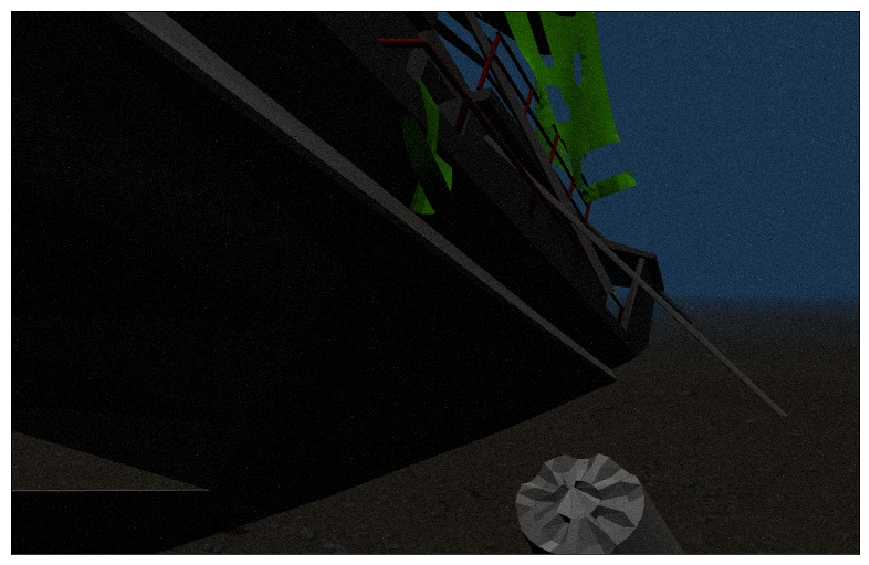

In [33]:
plt.imshow(rgbimg)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

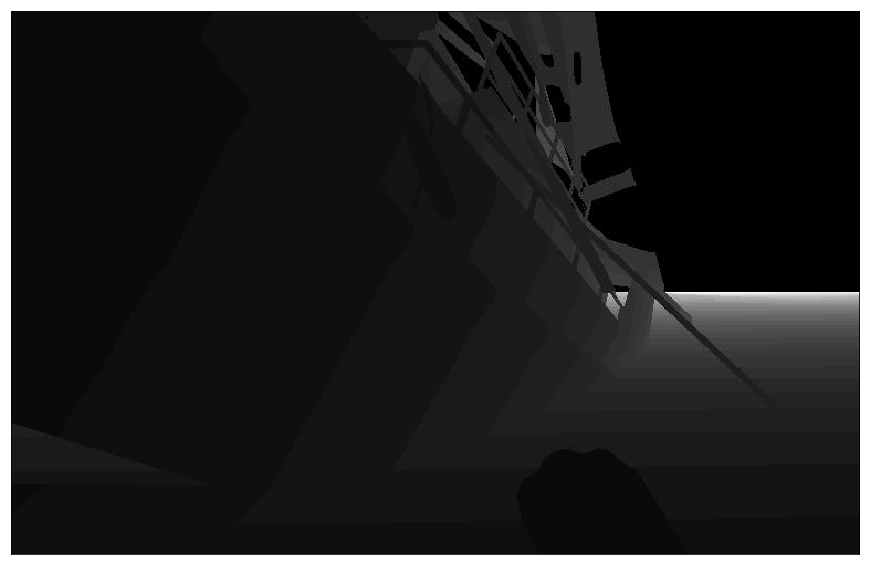

In [34]:
plt.imshow(depthimg, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

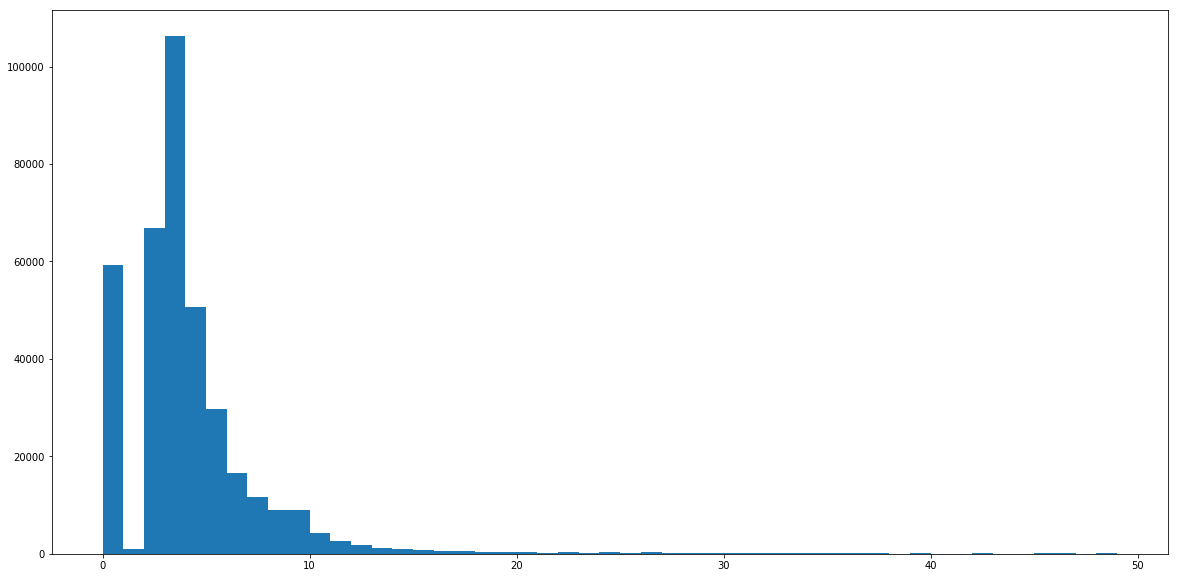

In [35]:
plt.hist(depthimg.ravel(),np.amax(depthimg),[0,np.amax(depthimg)]); plt.show()

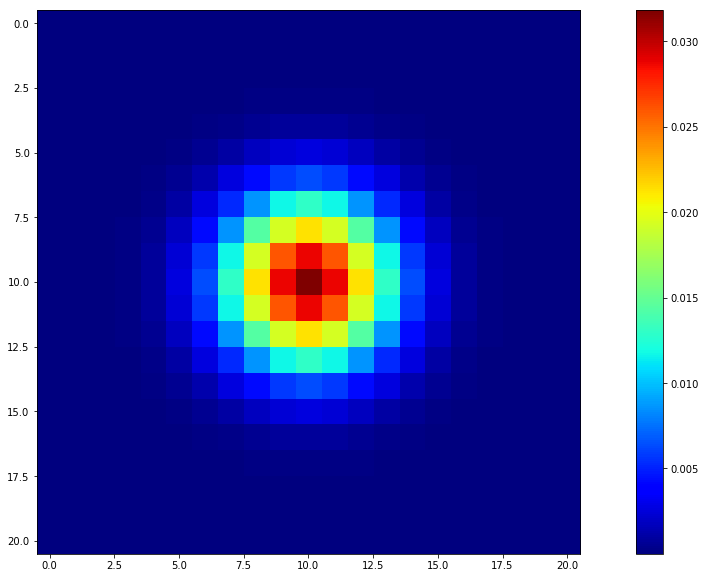

In [36]:
# http://subsurfwiki.org/wiki/Gaussian_filter
def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = np.mgrid[-size:size+1, -size_y:size_y+1]
    g = np.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 
# Make the Gaussian by calling the function
gaussian_kernel_array = gaussian_kernel(10)
 
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

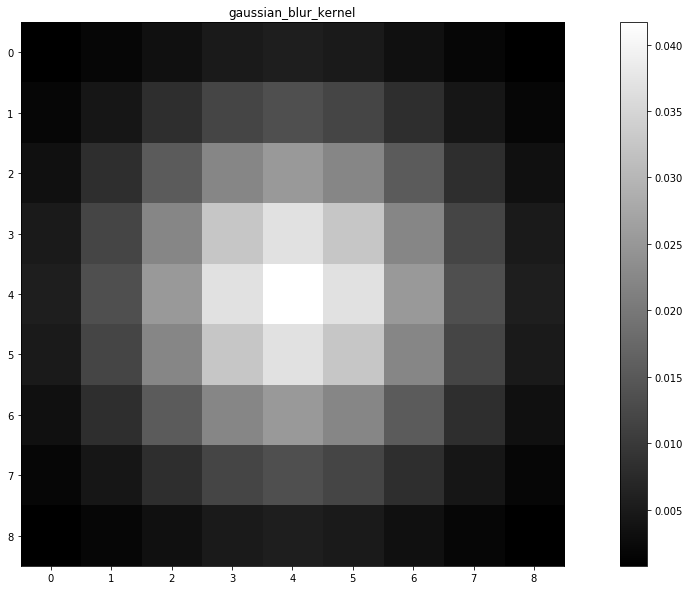

In [37]:
# https://nbviewer.jupyter.org/github/mroberts3000/GpuComputing/blob/master/IPython/GaussianBlur.ipynb
import scipy

gaussian_blur_kernel_width      = np.int32(9)
gaussian_blur_kernel_half_width = np.int32(4)
gaussian_blur_sigma             = np.float32(2)

y, x = \
    scipy.mgrid[-gaussian_blur_kernel_half_width:gaussian_blur_kernel_half_width+1,
                -gaussian_blur_kernel_half_width:gaussian_blur_kernel_half_width+1]

gaussian_blur_kernel_not_normalized = np.exp( ( - ( x**2 + y**2 ) ) / ( 2 * gaussian_blur_sigma**2 ) )
normalization_constant              = np.float32(1) / np.sum(gaussian_blur_kernel_not_normalized)
gaussian_blur_kernel                = (normalization_constant * gaussian_blur_kernel_not_normalized).astype(np.float32)



plt.imshow(gaussian_blur_kernel, cmap="gray", interpolation="nearest");
plt.title("gaussian_blur_kernel");
plt.colorbar();

In [38]:
# import the necessary packages
#import imutils

def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			# yield the current window
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [42]:
# define the window width and height
clone = rgbimg.copy()
(winW, winH) = (10, 10)
print(np.amax(depthimg))

for (x, y, window) in sliding_window(clone, stepSize=7, windowSize=(winW, winH)):
	# if the window does not meet our desired window size, ignore it
	if window.shape[0] != winH or window.shape[1] != winW:
		continue

	sig = np.mean(depthimg[y:y + winW, x:x + winH])+1
    
	print (sig)
	clone[y:y + winW, x:x + winH] = cv2.GaussianBlur(window,(winW-1, winH-1), int(sig))
	

	# since we do not have a classifier, we'll just draw the window
	#clone = rgbimg.copy()
	#cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
	#cv2.imshow("Window", clone)
	#cv2.waitKey(1)

49
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.4
3.98
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.029999999999999
4.73
5.67
5.93
6.0
6.0
6.0
6.0
6.0
6.0
6.0
5.52
2.69
5.57
9.83
8.92
8.030000000000001
8.24
9.09
9.0
8.71
8.04
8.48
9.35
9.91
9.25
9.05
9.52
9.99
10.0
9.99
9.84
4.0600000000000005
1.08
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.08
3.75
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.05
4.93
5.91
6.0
6.0
6.0
6.0
6.0
6.01
6.0
6.91
6.42
2.2800000000000002
4.6
8.92
8.04
5.28
6.17
9.17
9.62
8.46
8.27
9.16
9.91
9.46
9.0
9.21
9.93
10.0
10.0
10.0
5.28
1.1
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
3.0
3.0
3.0
3.

4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.37
4.970000000000001
5.0
4.75
4.08
4.0
4.1
4.779999999999999
5.0
5.0
5.0
5.0
5.36
7.13
8.0
7.67
6.5
6.88
7.93
7.72
7.31
8.280000000000001
10.82
10.83
8.65
5.58
1.05
1.0
1.0
1.0
1.05
1.18
1.1400000000000001
1.03
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.21
3.88
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.09
4.73
5.0
5.0
4.96
4.33
4.0
4.0
4.470000000000001
4.99
5.0
5.0
5.0
4.99
5.54
7.42
8.0
7.67
6.77
7.34
8.32
7.54
6.75
4.83
8.48
10.58
5.91
1.05
1.0
1.0
1.33
3.14
5.14
2.15
1.03
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.02
3.58
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0


24.4
24.4
24.4
24.4
24.4
24.44
24.47
24.4
24.35
24.38
24.4
24.4
24.4
24.4
24.43
24.37
24.3
24.3
24.3
24.3
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.1
3.78
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.029999999999999
4.609999999999999
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.45
5.97
6.0
6.0
6.0
6.0
6.0
6.18
6.81
7.0
7.0
7.45
8.0
8.0
8.0
8.23
8.9
12.08
12.11
10.08
10.8
11.82
15.97
20.59
19.76
13.77
10.15
15.84
20.54
20.6
20.6
20.46
20.4
20.4
20.4
20.37
20.3
20.24
20.2
20.2
20.2
20.2
20.2
20.2
20.16
20.02
20.0
20.0
20.06
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.46
3.98
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.279999999999999
4.92
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.23
5.88
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.28
6.88
7.1
7.78
8.0
8.0
8.030000000000001
8.59
9.0
9.0
9.62
10.14
10.98
12.07
15

4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.16
4.82
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.32
5.95
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.03
5.84
5.03
4.65
5.08
5.63
5.33
4.52
4.609999999999999
5.63
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
5.94
5.63
5.13
4.68
4.3100000000000005
4.01
3.99
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.52
4.99
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.08
5.69
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.01
5.43
3.94
3.11
2.98
3.11
3.51
3.28
3.01
3.0
3.77
5.36
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
5.97
5.68
5.2
4.8
4.35
4.04
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4

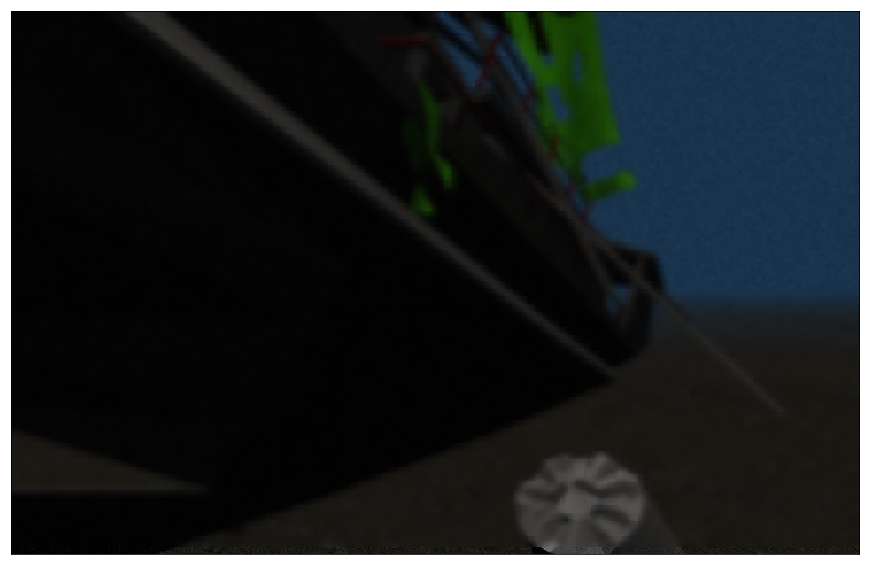

In [43]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(clone)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()